Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 10 in Python 
---------------
- ___Please put your names and student IDs here___:
    - Wei-Cheng Lin, 01/1348028
    - Kuon Ito, 01/1358810

---

#### Exercise 1: Cluster Quality 

In Ilias you can find the dataset "assign09-1.csv". Download it and load the data. For this exercise you will need the following imports.

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [8]:
df = pd.read_csv('assign09-1.csv')

##### __(a) Cluster  the  data  using  the  K-means algorithm. Do this three times, two clusters (k = 2), three clusters (k = 3.), and five clusters (k = 5).__

_(Hint: Set the parameter of k-means to `random_state=0`. And, of course, don't forget to rescale the data, if it is needed.)_

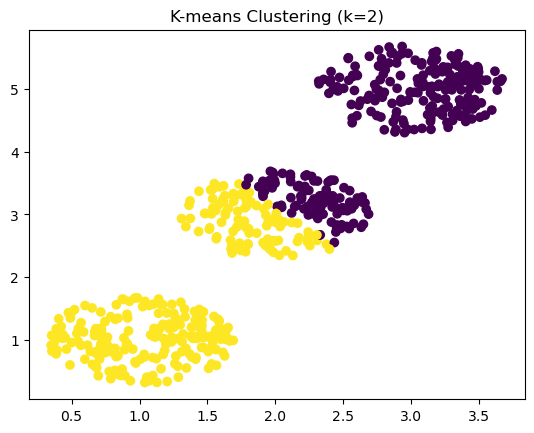

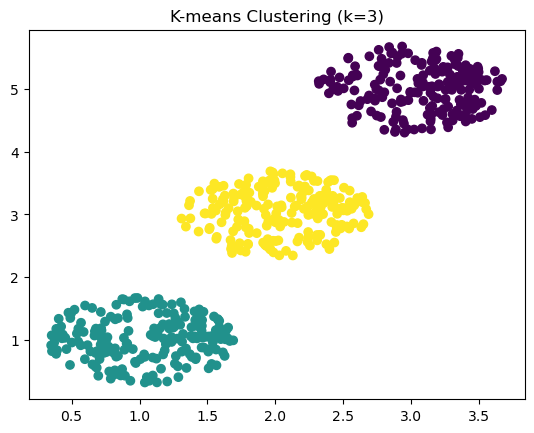

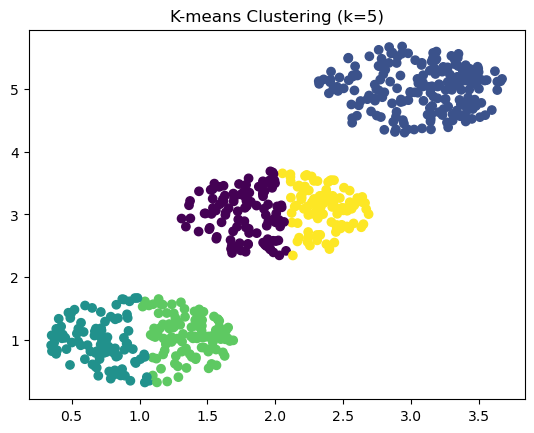

In [9]:
def scale_data(df):
    scaled_df = (df - df.min()) / (df.max() - df.min())
    return scaled_df

df_scaled = scale_data(df)

kmeans_2 = KMeans(n_clusters=2, random_state=0)
df['cluster_2'] = kmeans_2.fit_predict(df_scaled)

kmeans_3 = KMeans(n_clusters=3, random_state=0)
df['cluster_3'] = kmeans_3.fit_predict(df_scaled)

kmeans_5 = KMeans(n_clusters=5, random_state=0)
df['cluster_5'] = kmeans_5.fit_predict(df_scaled)

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster_2'], cmap='viridis')
plt.title('K-means Clustering (k=2)')
plt.show()

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster_3'], cmap='viridis')
plt.title('K-means Clustering (k=3)')
plt.show()

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster_5'], cmap='viridis')
plt.title('K-means Clustering (k=5)')
plt.show()

##### __(b) Calculate the silhouette coefficient for both of your cluster results (`k=2`, `k=3`, and `k=5`). Decide which clustering is better based on your result.__

In [10]:
silhouette_scores = []

for k in [2, 3, 5]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Silhouette Score for k={k}: {silhouette_avg}')

best_k = [2, 3, 5][np.argmax(silhouette_scores)]
print("--------------------------------------------")
print(f'The best clustering is when k = {best_k}.')

Silhouette Score for k=2: 0.5548370606946325
Silhouette Score for k=3: 0.6636954663012273
Silhouette Score for k=5: 0.5269190923274091
--------------------------------------------
The best clustering is when k = 3.


##### __(c) The cluster library allows you to get the silhouette for each individual data points. If a data point has a low silhouette, it is likely not clustered very well. For your clusterings (`k = 2`, `k = 3` and `k = 5`), plot the whole dataset in a scatterplot and color all data points with a silhouette of less than `0.5`.__

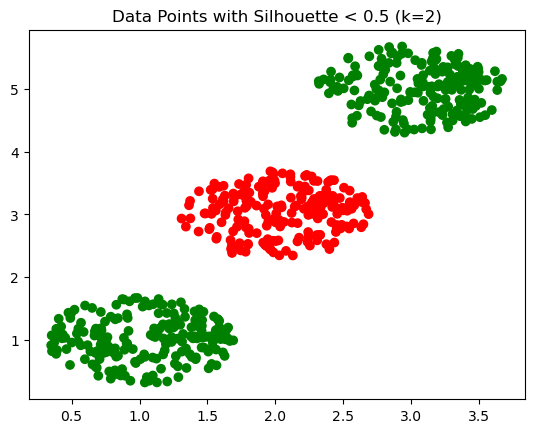

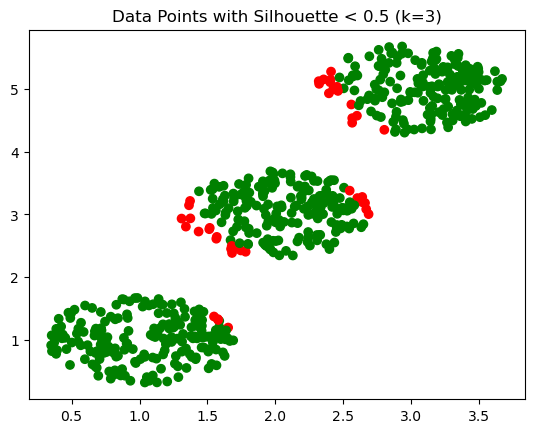

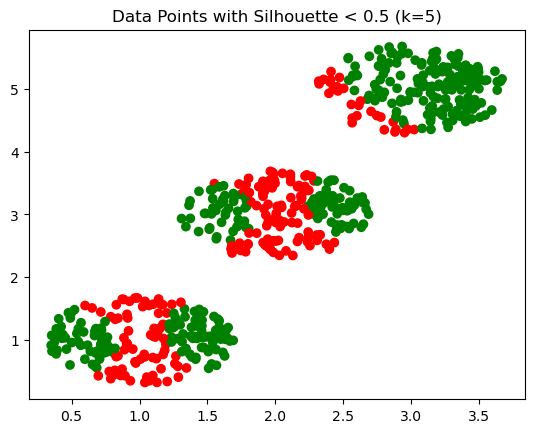

In [11]:
for k in [2, 3, 5]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_scaled)
    
    silhouette_avg = silhouette_samples(df_scaled, labels)
    
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=np.where(silhouette_avg < 0.5, 'red', 'green'), cmap='viridis')
    plt.title(f'Data Points with Silhouette < 0.5 (k={k})')
    plt.show()

##### __(d) Describe and reason about the results of (c). Link the findings of (c) to your choice of clustering in (b) regarding the highlighted points.__

```
> The lower number of red dots in the scatter plot for k=3 suggests that there are fewer data points with Silhouette scores below 0.5. This can be interpreted as a better separation between clusters, since fewer points have ambiguous cluster assignments. Moreover, the Silhouette score for k=3 is the highest among all three, which indcates that k=3 offers the best clustering result.
```

---

#### Exercise 2: k-means VS k-medoids 

In Ilias you can find the dataset "assign09-2.csv". Download it and load the data. For this exercise you will need the following imports.

In [12]:
# pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv('assign09-2.csv')

__(a) Cluster  the  data  using  the  *K-means* algorithm with `k=3` and plot the result.__

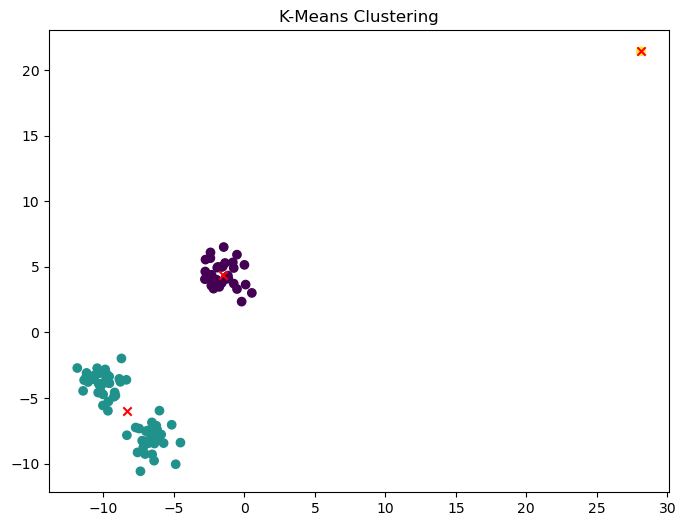

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
plt.title('K-Means Clustering')
plt.show()

__(b) Cluster the data using the *K-medoids* algorithm with `k=3` and plot the results.__

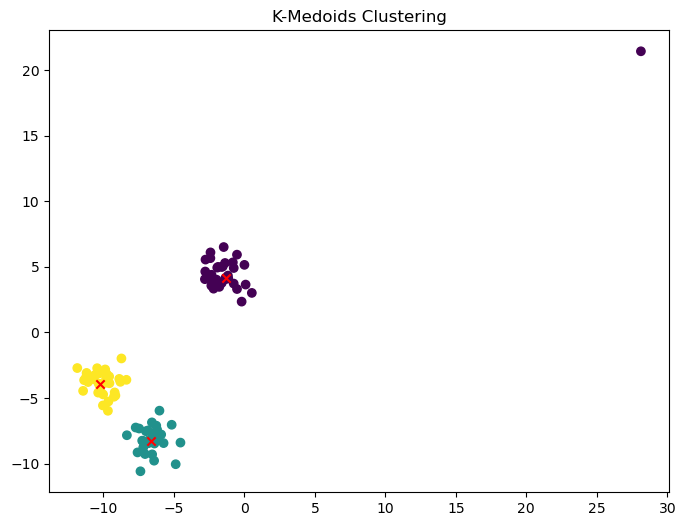

In [15]:
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(df)

labels = kmedoids.labels_
medoids = kmedoids.medoid_indices_

plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.scatter(df.iloc[medoids, 0], df.iloc[medoids, 1], c='red', marker='x')
plt.title('K-Medoids Clustering')
plt.show()

__(c) Describe the results from (a) and (b). Discuss the differences and *why* the results are different?__

```
> K-means uses the mean(centroid) of the data points in a cluster to represent that cluster, while K-medoids uses the medoid, which is the data point with the minimum average dissimilarity to all other points in the cluster. This means K-means is sensitive to outliers because the mean is influenced by extreme values, which is why in the first plot, the data located at the top right forms a single cluster. On the other hand, the sceond plot(K-medoids) is more robust to outliers, resulting in more distinct separation of data points.
```

---

***<span style="color:green">Grade: Green</span>***
